<a href="https://colab.research.google.com/github/tuliosil/LeIA/blob/master/TripAdvisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PoC - Treinamento de Inteligência Artificial

O presente relatório faz as vezes de prova de conceito para o modelo de inteligência que se pleitea. 

Como primeira etapa, preparamos o ambiente de trabalho fazendo o download do pacote de Inteligência Artificial do FastAi

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 194kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 


A seguir, realizamos as importações necessárias para exibir os dados necessários à prova de conceito.

In [ ]:
from fastai.text.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Para sermos capazes de operar com dados externos (como nossos corpus, datasets etc) é preciso habilitar o acesso ao Google Drive. Por meio dos comandos abaixo, o acesso ao drive está garantido.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Acessamos o Google Drive para obter acesso ao arquivo QS(Poc)2.csv, que é a planilha com nosso corpus anotado

In [ ]:
df = pd.read_csv("/content/drive/My Drive/QS(PoC)2.csv", delimiter=';')

## Análise descritiva

Abaixo, é possível visualizar as cinco primeiras linhas de nosso dataset:

In [ ]:
df.head()

,review_body,segmento,direção
0,"alomoço com amigos comemoração de final de ano, fomos bem acomodados, atendimento a contento, bebidas de acordo e comida boa e bem servida.",3,1
1,Jantar de negócios com serviço de primeira dos garçons :João Paulo e Wagner e o Somellier Wellington,3,1
2,Leonardo atendimento muito bom gente finíssima! Comida muito boa! Muito atenciosos! Parabéns! ¡!!!!!,3,1
3,.minha primeira visita ao restaurante fui mt bem atendida e no final surpreendida com um pedido de namoro,3,1
4,1.000 excelente atendimento do gerente Charles juntamente c sua equipe...parabéns pára todos garçom souza nos auxiliou muito bem.,3,1


Por meio do comando .info() é possível observar que o corpus tem 2602 linhas (são as amostras de avaliações de restaurantes) e é formado por três colunas (o cabeçalho, com a discriminação das colunas, não é computado como linha). 

Na primeira coluna, encontram-se as avaliações de restaurante em formato de texto. Nas duas últimas temos, respectivamente, o segmento (atenuação, saturação, recrudescimento, minimização e extinção) e a direção (ascendente ou descendente). É possível perceber que ambas são compostas por dados em formato de números inteiros, uma vez que optamos pela notação numérica para facilitar a classificação do corpus. 

Acima, na apresentação das cinco primeiras linhas de nosso corpus, é possível visualizar um exemplo da classificação. A notação em 'segmento' igual a 3 representa recrudescimento, enquanto que a direção 1 é a ascendência. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  2602 non-null   object
 1   segmento     2602 non-null   int64 
 2   direção      2602 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


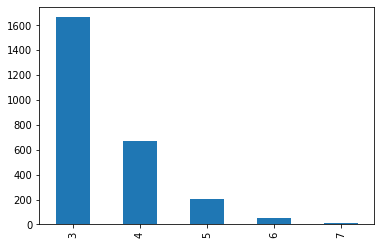

In [ ]:
df['segmento'].value_counts().plot(kind='bar')

In [28]:
df.segmento.value_counts()

3    1664
4     668
5     206
6      52
7      12
Name: segmento, dtype: int64

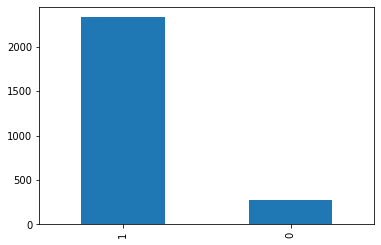

In [ ]:
df['direção'].value_counts().plot(kind='bar')

In [29]:
df.direção.value_counts()

1    2332
0     270
Name: direção, dtype: int64

# Treinamento

## Y = Direção Tensiva

In [ ]:
dls = TextDataLoaders.from_df(df, text_col='review_body', label_col='direção', valid_pct=0.2, seed=42)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.852796,0.656717,0.626923,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.576317,0.366729,0.884615,00:05
1,0.438013,0.316961,0.884615,00:05
2,0.360704,0.249289,0.890385,00:05
3,0.308875,0.225734,0.921154,00:05


Devido a problemas técnicos, o presente notebook não está exportando a imagem acima (relação entre epocas e acurácia). Por conta disso, optamos por inserir a captura de tela abaixo.

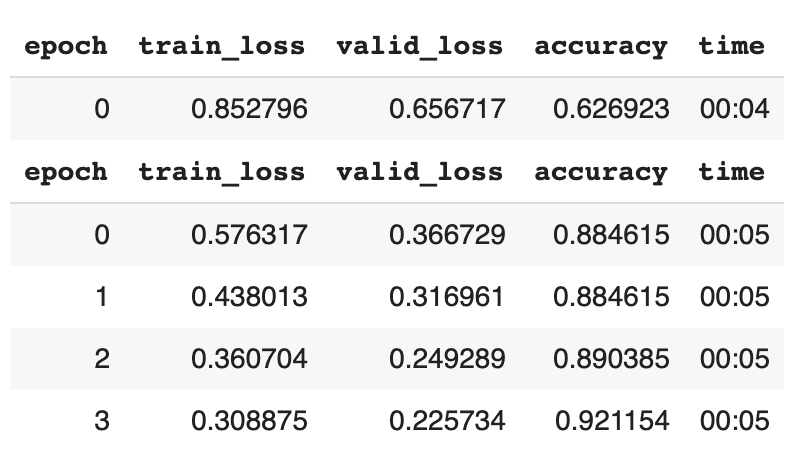

SuggestedLRs(lr_min=0.00014454397605732084, lr_steep=7.585775847473997e-07)

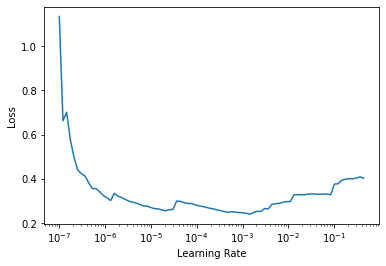

In [ ]:
learn.lr_find()

## Y = Segmento Tensivo

In [ ]:
dls1 = TextDataLoaders.from_df(df, text_col='review_body', label_col='segmento', valid_pct=0.2, seed=42)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.843774,0.506926,0.830769,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.591655,0.373211,0.838462,00:05
1,0.437301,0.262755,0.886538,00:05
2,0.357397,0.225929,0.925000,00:05
3,0.304911,0.214109,0.925000,00:05


Devido a problemas técnicos, o presente notebook não está exportando a imagem acima (relação entre epocas e acurácia). Por conta disso, optamos por inserir a captura de tela abaixo.

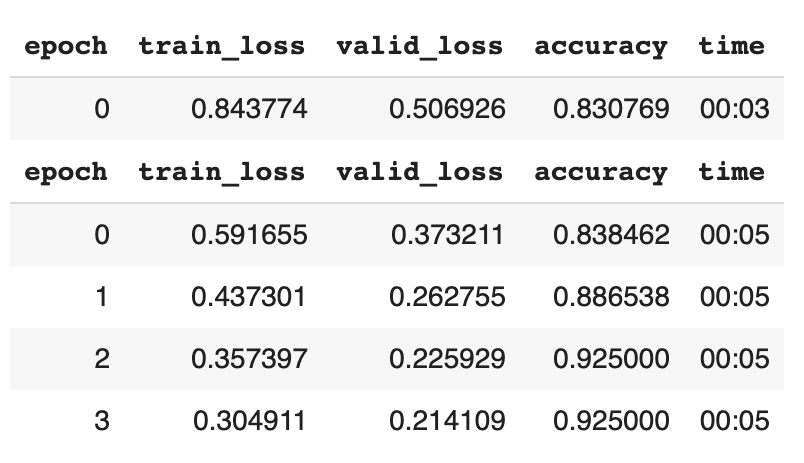

SuggestedLRs(lr_min=0.0002511886414140463, lr_steep=6.309573450380412e-07)

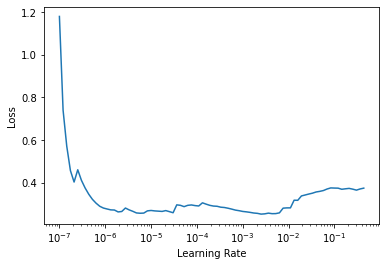

In [ ]:
learn.lr_find()